<a href="https://colab.research.google.com/github/Clizzyvibes/Coventry-University/blob/main/Machine_Learning_Course_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Akeru Chukwuemeka Clinton
##  ID No : 15519674

##ML Assignment
Chosen topic:
**Application of Machine Learning Techniques to Human Activity Recognition with Smartphones for Multiclass Classification and Performance Evaluation**

### 1.  Importing necessary libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### 2.  Noting the necessary details:
 Some details about the dataset are provide by UCI on the dataset page of the [Human Activity Recognition Using Smartphones](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones) dataset and with files gotten from the dataset folder like: `README.txt`, `features_info.txt`, `UCI HAR Dataset.names` which provide some context to the dataset.

In [ ]:
# About the dataset

readme_path = "/content/drive/MyDrive/Dataset/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/README.txt" # "path_to/UCI HAR Dataset/"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from IPython.display import display, Markdown

# Open using a fallback encoding to fix utf-8 error
with open(readme_path, 'r', encoding='latin-1') as file:
    readme_content = file.read()

# Display with Markdown inside a code block
display(Markdown(f"```\n{readme_content}\n```"))


```
===================================================================================================
Human Activity Recognition Using Smartphones Dataset
Version 1.0
===================================================================================================
Jorge L. Reyes-Ortiz(1,2), Davide Anguita(1), Alessandro Ghio(1), Luca Oneto(1) and Xavier Parra(2)
1 - Smartlab - Non-Linear Complex Systems Laboratory
DITEN - Università  degli Studi di Genova, Genoa (I-16145), Italy. 
2 - CETpD - Technical Research Centre for Dependency Care and Autonomous Living
Universitat Politècnica de Catalunya (BarcelonaTech). Vilanova i la Geltrú (08800), Spain
activityrecognition '@' smartlab.ws 
===================================================================================================

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain. See 'features_info.txt' for more details. 

For each record it is provided:
======================================

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 
- An identifier of the subject who carried out the experiment.

The dataset includes the following files:
=========================================

- 'README.txt'

- 'features_info.txt': Shows information about the variables used on the feature vector.

- 'features.txt': List of all features.

- 'activity_labels.txt': Links the class labels with their activity name.

- 'train/X_train.txt': Training set.

- 'train/y_train.txt': Training labels.

- 'test/X_test.txt': Test set.

- 'test/y_test.txt': Test labels.

The following files are available for the train and test data. Their descriptions are equivalent. 

- 'train/subject_train.txt': Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30. 

- 'train/Inertial Signals/total_acc_x_train.txt': The acceleration signal from the smartphone accelerometer X axis in standard gravity units 'g'. Every row shows a 128 element vector. The same description applies for the 'total_acc_x_train.txt' and 'total_acc_z_train.txt' files for the Y and Z axis. 

- 'train/Inertial Signals/body_acc_x_train.txt': The body acceleration signal obtained by subtracting the gravity from the total acceleration. 

- 'train/Inertial Signals/body_gyro_x_train.txt': The angular velocity vector measured by the gyroscope for each window sample. The units are radians/second. 

Notes: 
======
- Features are normalized and bounded within [-1,1].
- Each feature vector is a row on the text file.
- The units used for the accelerations (total and body) are 'g's (gravity of earth -> 9.80665 m/seg2).
- The gyroscope units are rad/seg.
- A video of the experiment including an example of the 6 recorded activities with one of the participants can be seen in the following link: http://www.youtube.com/watch?v=XOEN9W05_4A

For more information about this dataset please contact: activityrecognition '@' smartlab.ws

License:
========
Use of this dataset in publications must be acknowledged by referencing the following publication [1] 

[1] Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. A Public Domain Dataset for Human Activity Recognition Using Smartphones. 21th European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013. 

This dataset is distributed AS-IS and no responsibility implied or explicit can be addressed to the authors or their institutions for its use or misuse. Any commercial use is prohibited.

Other Related Publications:
===========================
[2] Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra, Jorge L. Reyes-Ortiz.  Energy Efficient Smartphone-Based Activity Recognition using Fixed-Point Arithmetic. Journal of Universal Computer Science. Special Issue in Ambient Assisted Living: Home Care.   Volume 19, Issue 9. May 2013

[3] Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine. 4th International Workshop of Ambient Assited Living, IWAAL 2012, Vitoria-Gasteiz, Spain, December 3-5, 2012. Proceedings. Lecture Notes in Computer Science 2012, pp 216-223. 

[4] Jorge Luis Reyes-Ortiz, Alessandro Ghio, Xavier Parra-Llanas, Davide Anguita, Joan Cabestany, Andreu Català. Human Activity and Motion Disorder Recognition: Towards Smarter Interactive Cognitive Environments. 21th European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013.  

==================================================================================================
Jorge L. Reyes-Ortiz, Alessandro Ghio, Luca Oneto, Davide Anguita and Xavier Parra. November 2013.

```

In [ ]:
# About the features dataset

features_info_path = "/content/drive/MyDrive/Dataset/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/features_info.txt" # "path_to/UCI HAR Dataset/"


In [ ]:
# Open using a fallback encoding to fix utf-8 error
with open(features_info_path, 'r', encoding='latin-1') as file:
    feature_content = file.read()

# Display with Markdown inside a code block
display(Markdown(f"```\n{feature_content}\n```"))

```
Feature Selection 
=================

The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 

Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). 

These signals were used to estimate variables of the feature vector for each pattern:  
'-XYZ' is used to denote 3-axial signals in the X, Y and Z directions.

tBodyAcc-XYZ
tGravityAcc-XYZ
tBodyAccJerk-XYZ
tBodyGyro-XYZ
tBodyGyroJerk-XYZ
tBodyAccMag
tGravityAccMag
tBodyAccJerkMag
tBodyGyroMag
tBodyGyroJerkMag
fBodyAcc-XYZ
fBodyAccJerk-XYZ
fBodyGyro-XYZ
fBodyAccMag
fBodyAccJerkMag
fBodyGyroMag
fBodyGyroJerkMag

The set of variables that were estimated from these signals are: 

mean(): Mean value
std(): Standard deviation
mad(): Median absolute deviation 
max(): Largest value in array
min(): Smallest value in array
sma(): Signal magnitude area
energy(): Energy measure. Sum of the squares divided by the number of values. 
iqr(): Interquartile range 
entropy(): Signal entropy
arCoeff(): Autorregresion coefficients with Burg order equal to 4
correlation(): correlation coefficient between two signals
maxInds(): index of the frequency component with largest magnitude
meanFreq(): Weighted average of the frequency components to obtain a mean frequency
skewness(): skewness of the frequency domain signal 
kurtosis(): kurtosis of the frequency domain signal 
bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
angle(): Angle between to vectors.

Additional vectors obtained by averaging the signals in a signal window sample. These are used on the angle() variable:

gravityMean
tBodyAccMean
tBodyAccJerkMean
tBodyGyroMean
tBodyGyroJerkMean

The complete list of variables of each feature vector is available in 'features.txt'

```

In [ ]:
# About the Readme dataset

UCI_HAR_Dataset_names_path = "/content/drive/MyDrive/Dataset/human+activity+recognition+using+smartphones/UCI HAR Dataset.names"


In [ ]:
# Open using a fallback encoding to fix utf-8 error
with open(UCI_HAR_Dataset_names_path, 'r', encoding='latin-1') as file:
    UCI_HAR_Dataset_names_content = file.read()

# Display with Markdown inside a code block
display(Markdown(f"```\n{UCI_HAR_Dataset_names_content}\n```"))

```
===================================================================================================
Human Activity Recognition Using Smartphones Dataset
Version 1.0
===================================================================================================
Jorge L. Reyes-Ortiz(1,2), Davide Anguita(1), Alessandro Ghio(1), Luca Oneto(1) and Xavier Parra(2)
1 - Smartlab - Non-Linear Complex Systems Laboratory
DITEN - Università  degli Studi di Genova, Genoa (I-16145), Italy. 
2 - CETpD - Technical Research Centre for Dependency Care and Autonomous Living
Universitat Politècnica de Catalunya (BarcelonaTech). Vilanova i la Geltrú (08800), Spain
activityrecognition '@' smartlab.ws 
===================================================================================================

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain. See 'features_info.txt' for more details. 

For each record it is provided:
======================================

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 
- An identifier of the subject who carried out the experiment.

The dataset includes the following files:
=========================================

- 'README.txt'

- 'features_info.txt': Shows information about the variables used on the feature vector.

- 'features.txt': List of all features.

- 'activity_labels.txt': Links the class labels with their activity name.

- 'train/X_train.txt': Training set.

- 'train/y_train.txt': Training labels.

- 'test/X_test.txt': Test set.

- 'test/y_test.txt': Test labels.

The following files are available for the train and test data. Their descriptions are equivalent. 

- 'train/subject_train.txt': Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30. 

- 'train/Inertial Signals/total_acc_x_train.txt': The acceleration signal from the smartphone accelerometer X axis in standard gravity units 'g'. Every row shows a 128 element vector. The same description applies for the 'total_acc_x_train.txt' and 'total_acc_z_train.txt' files for the Y and Z axis. 

- 'train/Inertial Signals/body_acc_x_train.txt': The body acceleration signal obtained by subtracting the gravity from the total acceleration. 

- 'train/Inertial Signals/body_gyro_x_train.txt': The angular velocity vector measured by the gyroscope for each window sample. The units are radians/second. 

Notes: 
======
- Features are normalized and bounded within [-1,1].
- Each feature vector is a row on the text file.
- The units used for the accelerations (total and body) are 'g's (gravity of earth -> 9.80665 m/seg2).
- The gyroscope units are rad/seg.
- A video of the experiment including an example of the 6 recorded activities with one of the participants can be seen in the following link: http://www.youtube.com/watch?v=XOEN9W05_4A

For more information about this dataset please contact: activityrecognition '@' smartlab.ws

License:
========
Use of this dataset in publications must be acknowledged by referencing the following publication [1] 

[1] Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. A Public Domain Dataset for Human Activity Recognition Using Smartphones. 21th European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013. 

This dataset is distributed AS-IS and no responsibility implied or explicit can be addressed to the authors or their institutions for its use or misuse. Any commercial use is prohibited.

Other Related Publications:
===========================
[2] Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra, Jorge L. Reyes-Ortiz.  Energy Efficient Smartphone-Based Activity Recognition using Fixed-Point Arithmetic. Journal of Universal Computer Science. Special Issue in Ambient Assisted Living: Home Care.   Volume 19, Issue 9. May 2013

[3] Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine. 4th International Workshop of Ambient Assited Living, IWAAL 2012, Vitoria-Gasteiz, Spain, December 3-5, 2012. Proceedings. Lecture Notes in Computer Science 2012, pp 216-223. 

[4] Jorge Luis Reyes-Ortiz, Alessandro Ghio, Xavier Parra-Llanas, Davide Anguita, Joan Cabestany, Andreu Català. Human Activity and Motion Disorder Recognition: Towards Smarter Interactive Cognitive Environments. 21th European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013.  

==================================================================================================
Jorge L. Reyes-Ortiz, Alessandro Ghio, Luca Oneto, Davide Anguita and Xavier Parra. November 2013.

```

#### **Dataset Summary - UCI HAR (Human Activity Recognition)**

Based on the contents of these files from the dataset (`README.txt`, `features_info.txt`, and `UCI HAR Dataset.names`), a few details are noted to help in *dataset processing and algorithm selection*:


##### **Purpose**
To recognize human activities (like walking, standing, etc.) using data from a smartphone's *accelerometer* and *gyroscope sensors*.


#### Dataset Structure

Each record contains:
- **561 features** derived from accelerometer and gyroscope signals
- **Activity label** of 6 activities: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING
- **Subject ID** (1 to 30)

This gives a total of 563 column values when combined together.

##### File Breakdown
- `X_train.txt`, `X_test.txt` - Feature vectors (561 per sample)
- `y_train.txt`, `y_test.txt` - Corresponding activity labels
- `subject_train.txt`, `subject_test.txt` - Subject IDs
- `features.txt` - Names of all 561 features
- `Inertial Signals/` - Raw signal data per axis (X, Y, Z) for total acceleration, body acceleration, and gyroscope (used for deeper analysis if needed)


#### Feature Extraction & Preprocessing

##### Raw Signals Used:
- `tBodyAcc-XYZ`, `tGravityAcc-XYZ`, `tBodyGyro-XYZ` - Time domain
- `tBodyAccJerk-XYZ`, `tBodyGyroJerk-XYZ` - Jerk signals (rate of change)
- `tBodyAccMag`, `fBodyAccMag`, etc. - Signal magnitudes (Euclidean norm)
- `fBody...` - Frequency domain features (via FFT)

##### Feature Types:
- **Statistical**: `mean()`, `std()`, `mad()`, `min()`, `max()`, `iqr()`
- **Signal processing**: `energy()`, `entropy()`, `arCoeff()`, `meanFreq()`, `skewness()`, `kurtosis()`, `bandsEnergy()`
- **Geometric**: `angle()` - angles between vectors like `tBodyAccMean` and `gravityMean`
- Total: **561 numeric features**

##### Preprocessing Notes:
- Signals sampled at 50Hz
- Sliding windows: 2.56 seconds (128 samples), 50% overlap
- Butterworth filters applied (e.g., low-pass filter at 0.3 Hz for gravity)
- Features normalized to [-1, 1] which makes it easier to work with the data directly.

---

#### Things to do and consider for Processing the Dataset & possible Algorithm Design for working on it

##### For Data Preparation
- Combine `X_train`, `y_train`, and `subject_train` into one DataFrame
- Then repeat for test data
- Label encode activity names using `activity_labels.txt` as this is the dependent value to be predicted/found.
- Standardize the values as it is necessary for values to be on the same scale, although the features are already normalized so this can be optional.

##### Feature Engineering and insights
- Reduce dimensionality with *PCA* for visualization or faster training
- Perform *feature selection* to avoid overfitting
- Employing statistical techniques to summarize and analyze the data, such as descriptive statistics and correlation analysis.
- Some Visualization.

##### Algorithm Suggestions
This is a **multiclass classification** problem (6 labels) as already stated on the UCI site the Dataset characteristics is *Multivariate* and *Time-Series* based. And based on this I would consider the following algorithms but focus on just three (3):

| Algorithm                     | Notes                                                                 |
|------------------------------|-----------------------------------------------------------------------|
| ✅ Decision Tree            | Simple, interpretable, and handles both numerical and categorical data. It handles high-dimensional features well but it is prone to over fitting                      |
| ✅ Random Forest             | Ensemble of decision trees, it improves accuracy and reduces overfitting.                    |
| ✅ Support Vector Machines    | Used in the original paper; high accuracy but sensitive to scaling    |
| ✅ k-Nearest Neighbors        | Simple baseline                                                       |
| ✅ Neural Networks (MLP/CNN)  | Can be used directly on features or raw signal (with Conv1D or LSTM) |
| ✅ Gradient Boosting (XGBoost)| Excellent accuracy and interpretability                               |

I would start with traditional ML (e.g., Random Forest or SVM) and then scale up to deep learning (especially if using raw signals from `Inertial Signals/`).

---

#### 📚 Citations and Related Work
Based on the information gotten from this documented file shows that the dataset originates from [Anguita et al., 2013], and multiple follow-up studies have explored SVMs and fixed-point implementations for efficiency. The original research used a **multiclass SVM with a linear kernel**.

## Diving into the Experimental Results section by performing the following steps:

**Data Loading and Exploration:** Load the train and test datasets to inspect the structure and contents.

**Data Preprocessing:** Normalize the features and apply PCA if necessary.

**Model Training and Testing:** Train SVM, Decision Trees, and KNN using the training data.

**Model Evaluation:** Test the models on the test data and compute evaluation metrics using accuracy, F1-score, confusion matrix.

**Comparison of Results:** Present accuracy, precision, recall, and F1-score for each model.

### **3.  Dataset Preparation**

Before we begin training the machine learning models, we must ensure our dataset is clean and structured properly. Dataset preparation involves:

1. **Loading the Dataset** - Importing data from a file into a Pandas DataFrame.
2. **Data Wrangling** (involves Cleaning and Structuring the Dataset):
  * **Handling Missing Values** - Identifying and resolving missing data to prevent biases.
  * **Removing Duplicates** - Eliminating redundant records to maintain data integrity.
  * **Checking & Converting Data Types** - Ensuring numerical and categorical data are correctly formatted.
  * **Exploratory Data Analysis (EDA)** - Understanding data distribution, summary statistics, and patterns.
3. **Data Preprocessing**
  * **Feature scaling/Standardization** - This ensures that all numerical features have the same scale, preventing certain features from dominating others due to different units or ranges.
  * **Encoding categorical variables** - Machine learning models require numerical inputs to work optimally, so categorical variables must be converted into numbers.
  * **Organizing the train and test datasets** - Splitting ensures the model is evaluated on unseen data, preventing overfitting.
  * **Dimensionality Reduction** - This is a technique used in data preprocessing to reduce the number of input variables (features) while retaining as much relevant information as possible.


Proper dataset preparation would ensure a *high-quality input for machine learning models*, leading to more reliable predictions.


#### 3.1.  Importing Libraries and Loading Data

In [ ]:
# Define file paths
data_path = "/content/drive/MyDrive/Dataset/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/" # "path_to/UCI HAR Dataset/"

# Load feature names
features = pd.read_csv(data_path + "features.txt", sep="\s+", header=None, usecols=[1], names=['feature'])

# Fix duplicate column names by appending an index
features['feature'] = features['feature'].astype(str)  # Convert to string to avoid NaNs
features['feature'] = features.groupby('feature').cumcount().astype(str) + "_" + features['feature']
feature_names = features['feature'].tolist()

# Load activity labels
activity_labels = pd.read_csv(data_path + "activity_labels.txt", sep="\s+", header=None, names=['label', 'activity'])

# Function to load dataset (train/test)
def load_dataset(dataset="train"):
    X = pd.read_csv(data_path + f"{dataset}/X_{dataset}.txt", sep='\s+', header=None, names=feature_names)
    y = pd.read_csv(data_path + f"{dataset}/y_{dataset}.txt", header=None, names=['label'])
    subjects = pd.read_csv(data_path + f"{dataset}/subject_{dataset}.txt", header=None, names=['subject'])

    # Merge with activity labels
    y = y.merge(activity_labels, on="label")

    return pd.concat([subjects, y['activity'], X], axis=1)



In [ ]:
# Load both train and test sets
train_data = load_dataset("train")
test_data = load_dataset("test")

# Combine them
full_data = pd.concat([train_data, test_data])

# Save to CSV
full_data.to_csv("UCI_HAR_Dataset.csv", index=False)

print("CSV saved successfully!")

CSV saved successfully!


In [ ]:
# Preview the data
print(train_data.head())
print(test_data.head())

   subject  activity  0_tBodyAcc-mean()-X  0_tBodyAcc-mean()-Y  \
0        1  STANDING             0.288585            -0.020294   
1        1  STANDING             0.278419            -0.016411   
2        1  STANDING             0.279653            -0.019467   
3        1  STANDING             0.279174            -0.026201   
4        1  STANDING             0.276629            -0.016570   

   0_tBodyAcc-mean()-Z  0_tBodyAcc-std()-X  0_tBodyAcc-std()-Y  \
0            -0.132905           -0.995279           -0.983111   
1            -0.123520           -0.998245           -0.975300   
2            -0.113462           -0.995380           -0.967187   
3            -0.123283           -0.996091           -0.983403   
4            -0.115362           -0.998139           -0.980817   

   0_tBodyAcc-std()-Z  0_tBodyAcc-mad()-X  0_tBodyAcc-mad()-Y  ...  \
0           -0.913526           -0.995112           -0.983185  ...   
1           -0.960322           -0.998807           -0.974914  ...

#### 3.2.  Data Wrangling

##### **Data Wrangling:**

* Explore the Data (EDA) - looking at summary statistics to gain insights.
* Check for missing values.
* **Drop the "subject" column** since it's not relevant to the classification task.


In [ ]:
train_data.describe()

,subject,0_tBodyAcc-mean()-X,0_tBodyAcc-mean()-Y,0_tBodyAcc-mean()-Z,0_tBodyAcc-std()-X,0_tBodyAcc-std()-Y,0_tBodyAcc-std()-Z,0_tBodyAcc-mad()-X,0_tBodyAcc-mad()-Y,0_tBodyAcc-mad()-Z,...,0_fBodyBodyGyroJerkMag-meanFreq(),0_fBodyBodyGyroJerkMag-skewness(),0_fBodyBodyGyroJerkMag-kurtosis(),"0_angle(tBodyAccMean,gravity)","0_angle(tBodyAccJerkMean),gravityMean)","0_angle(tBodyGyroMean,gravityMean)","0_angle(tBodyGyroJerkMean,gravityMean)","0_angle(X,gravityMean)","0_angle(Y,gravityMean)","0_angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,17.413085,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,8.975143,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8.000000,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,19.000000,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,26.000000,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,30.000000,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [ ]:
train_data.dtypes

,0
subject,int64
activity,object
0_tBodyAcc-mean()-X,float64
0_tBodyAcc-mean()-Y,float64
0_tBodyAcc-mean()-Z,float64
...,...
"0_angle(tBodyGyroMean,gravityMean)",float64
"0_angle(tBodyGyroJerkMean,gravityMean)",float64
"0_angle(X,gravityMean)",float64
"0_angle(Y,gravityMean)",float64


In [ ]:
train_data.dtypes.value_counts()

,count
float64,561
int64,1
object,1


In [ ]:
test_data.describe()

,subject,0_tBodyAcc-mean()-X,0_tBodyAcc-mean()-Y,0_tBodyAcc-mean()-Z,0_tBodyAcc-std()-X,0_tBodyAcc-std()-Y,0_tBodyAcc-std()-Z,0_tBodyAcc-mad()-X,0_tBodyAcc-mad()-Y,0_tBodyAcc-mad()-Z,...,0_fBodyBodyGyroJerkMag-meanFreq(),0_fBodyBodyGyroJerkMag-skewness(),0_fBodyBodyGyroJerkMag-kurtosis(),"0_angle(tBodyAccMean,gravity)","0_angle(tBodyAccJerkMean),gravityMean)","0_angle(tBodyGyroMean,gravityMean)","0_angle(tBodyGyroJerkMean,gravityMean)","0_angle(X,gravityMean)","0_angle(Y,gravityMean)","0_angle(Z,gravityMean)"
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,12.986427,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,...,0.130236,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720
std,6.950984,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,...,0.231018,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467
min,2.000000,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,...,-0.785543,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228
25%,9.000000,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,...,-0.008433,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485
50%,12.000000,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,...,0.142676,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671
75%,18.000000,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,...,0.288320,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373
max,24.000000,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,...,1.000000,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113


In [ ]:
test_data.dtypes.value_counts()

,count
float64,561
int64,1
object,1


##### *Looking through the dataset*

In [ ]:
# A sample code to test how to find if null valuee is present
my_dataframe = pd.DataFrame({
    'Column1': ["I", "Love", np.nan],
    'Column2': ["Python", np.nan, "The Best"]
})
my_dataframe.isnull().values.any()

np.True_

In [ ]:
train_data.isnull().values.any()

np.False_

In [ ]:
test_data.isnull().values.any()

np.False_

In [ ]:
train_data.head()

,subject,activity,0_tBodyAcc-mean()-X,0_tBodyAcc-mean()-Y,0_tBodyAcc-mean()-Z,0_tBodyAcc-std()-X,0_tBodyAcc-std()-Y,0_tBodyAcc-std()-Z,0_tBodyAcc-mad()-X,0_tBodyAcc-mad()-Y,...,0_fBodyBodyGyroJerkMag-meanFreq(),0_fBodyBodyGyroJerkMag-skewness(),0_fBodyBodyGyroJerkMag-kurtosis(),"0_angle(tBodyAccMean,gravity)","0_angle(tBodyAccJerkMean),gravityMean)","0_angle(tBodyGyroMean,gravityMean)","0_angle(tBodyGyroJerkMean,gravityMean)","0_angle(X,gravityMean)","0_angle(Y,gravityMean)","0_angle(Z,gravityMean)"
0,1,STANDING,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,STANDING,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,STANDING,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,STANDING,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,STANDING,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [ ]:
# Drop the 'subject' column from both train and test datasets
train_df = train_data.drop(columns=['subject'])
test_df = test_data.drop(columns=['subject'])

#### 3.3.  Data Preprocessing

##### A. **Data Preprocessing:**

* **Label Encoding:** Convert the categorical activity labels to numerical values.

* **Normalization:** Scale the features to the range [0, 1].

* **Dimensionality Reduction:** Applying PCA to help reduce dimensionality while retaining a good percentage of the variance.

* Then finally putting together the train and test datasets

In [ ]:
# Encode the 'Activity' column to numerical values using LabelEncoder
label_encoder = LabelEncoder()
train_df['activity'] = label_encoder.fit_transform(train_df['activity'])
test_df['activity'] = label_encoder.transform(test_df['activity'])

In [ ]:
list(label_encoder.classes_)

['LAYING',
 'SITTING',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

In [ ]:
# Separate features and target variable
X_train = train_df.drop(columns=['activity'])
y_train = train_df['activity']
X_test = test_df.drop(columns=['activity'])
y_test = test_df['activity']

In [ ]:
# Normalize the feature data using Min-Max Scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality while retaining 90% variance
pca = PCA(n_components=0.90, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the reduced dimensions and explained variance ratio
(X_train_pca.shape, X_test_pca.shape, pca.explained_variance_ratio_.sum())


((7352, 35), (2947, 35), np.float64(0.9021043686613501))

***Loading the data and performing initial preprocessing***

The datasets have been loaded successfully, and here's what we have:

**Training Data:**

Number of entries: 7,352

Number of features: 563 (561 numerical features, 1 subject ID, 1 activity label)

**Testing Data:**

Number of entries: 2,947

Number of features: 563 (same structure as training)

And looking through the data there is no null value as also stated from the UCI page and this confirms it by getting `np.False_` when `.isnull.values.any()` is used to check if there is any null value in the dataset.

Also the min and max values of the 561 features are mostly between -1 and 1 as stated in the documentation/guide file.

**Features:**

The features are mostly numerical, derived from sensor readings (accelerometer and gyroscope).


The "Activity" column contains the target variable which is the dependent value, while the "subject" column identifies the participant which is not necessary for us to note hence the need to have it eliminated.

#### **4. Model Training and Testing (Predictions)**

In [ ]:
# Initialize the models
# Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42)
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=20, random_state=42)
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the models
svm_model.fit(X_train_pca, y_train)
dt_model.fit(X_train_pca, y_train)
knn_model.fit(X_train_pca, y_train)



KNeighborsClassifier()

In [ ]:
# Predict using the test set
y_pred_svm = svm_model.predict(X_test_pca)
y_pred_dt = dt_model.predict(X_test_pca)
y_pred_knn = knn_model.predict(X_test_pca)

In [ ]:
print(X_test_pca.shape)

(2947, 35)


#### **5. Demo of the running model pipeline**

This section showcases the implemented machine learning pipeline model for Human Activity Recognition, utilizing the UCI HAR dataset as input.

* Activity Label Prediction
* Testing prediction with Random Inputs.


In [ ]:
def predict_activity(input_features, model="svm"):
    """
    Predicts activity label given an input feature vector.

    Parameters:
    - input_features (list or np.array): Feature vector with same number of features as training data.
    - model (str): Model to use for prediction ("svm", "dt", "knn").

    Returns:
    - Predicted activity label (string)
    """
    # Convert input to DataFrame with same feature names
    input_df = pd.DataFrame([input_features], columns=X_train.columns)

    # Normalize input features
    input_scaled = scaler.transform(input_df)

    # Apply PCA transformation
    input_pca = pca.transform(input_scaled)

    # Choose model
    if model == "svm":
        predicted_label = svm_model.predict(input_pca)
    elif model == "dt":
        predicted_label = dt_model.predict(input_pca)
    elif model == "knn":
        predicted_label = knn_model.predict(input_pca)
    else:
        raise ValueError("Invalid model choice. Choose from 'svm', 'dt', or 'knn'.")

    # Convert numerical label to actual activity name
    return label_encoder.inverse_transform(predicted_label)[0]  # FIXED


In [ ]:
# Example usage:
sample_input = X_test.iloc[0].tolist()  # Example input from test set

In [ ]:
print(len(sample_input)) # Seeing the number of feature values being used

561


In [ ]:
# SVM
predicted_activity = predict_activity(sample_input, model="svm")
print(f"Predicted Activity: {predicted_activity}")


Predicted Activity: STANDING


In [ ]:
# Decision Tree
predicted_activity = predict_activity(sample_input, model="dt")
print(f"Predicted Activity: {predicted_activity}")

Predicted Activity: STANDING


In [ ]:
# KNN
predicted_activity = predict_activity(sample_input, model="knn")
print(f"Predicted Activity: {predicted_activity}")

Predicted Activity: STANDING


In [ ]:
import random

# Generate 561 random float values between -1 and 1 instead of manually inputing 561 feature values
random_input = [random.uniform(-1, 1) for _ in range(561)]

In [ ]:
# Predict activity using the random input
# SVM
predicted_activity = predict_activity(random_input, model="svm")

print(f"Predicted Activity: {predicted_activity}")

Predicted Activity: WALKING


In [ ]:
# Predict activity using the random input
# Decision Tree
predicted_activity = predict_activity(random_input, model="dt")

print(f"Predicted Activity: {predicted_activity}")

Predicted Activity: WALKING_UPSTAIRS


In [ ]:
# Predict activity using the random input
# KNN
predicted_activity = predict_activity(random_input, model="knn")

print(f"Predicted Activity: {predicted_activity}")

Predicted Activity: WALKING


##### An explanation of the `predict_activity()` function, including how it is used and how many input values are needed to give a predicted output value:

---

## `predict_activity()` Function Explained

This function predicts a **human activity** (like walking, sitting, laying, etc.) from a list of numerical sensor features using a pre-trained machine learning model.

### Function Definition
```python
def predict_activity(input_features, model="svm"):
```
This allows stating the particular model to use allowing testing of the three model pipelines trained by putting model equal to 'svm', 'dt', or 'knn'
### ### Parameters:
- `input_features` (list or `np.array`):  
  A **list of feature values** representing sensor data from a wearable device (e.g., accelerometer, gyroscope).  
  ➤ **Must have exactly the same number of features** as used during training (usually **561 features** in the UCI HAR dataset), thus we can collect new data values to test.
  
- `model` (str):  
  The model to use for prediction:
  - `"svm"` → Support Vector Machine
  - `"dt"` → Decision Tree
  - `"knn"` → K-Nearest Neighbors  
  (*Default model is `"svm"`*)



---

### Step-by-Step Explanation

1. **Wrap input in a DataFrame**  
   ```python
   input_df = pd.DataFrame([input_features], columns=X_train.columns)
   ```
   ➤ Makes the input compatible with the scaler and PCA transformation by using the original feature names.

2. **Normalize the input using Min-Max Scaler**  
   ```python
   input_scaled = scaler.transform(input_df)
   ```
   ➤ This ensures consistency with how the training data was preprocessed.

3. **Apply PCA for dimensionality reduction**  
   ```python
   input_pca = pca.transform(input_scaled)
   ```
   ➤ Reduces the high-dimensional input into fewer components while preserving ~90% of the variance.

4. **Model selection & prediction**  
   ```python
   if model == "svm":
       predicted_label = svm_model.predict(input_pca)
   elif model == "dt":
       ...
   ```
   ➤ Chooses and uses the selected model to predict the activity label.

5. **Convert prediction from number to label**  
   ```python
   return label_encoder.inverse_transform(predicted_label)[0]
   ```
   ➤ Translates predicted numeric label back to a human-readable label like `"WALKING"` or `"SITTING"`.

---

### Output
Returns one of the following activity labels:

```python
['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
```



---

#### How to input test values

```python
#  A real test sample canbe used:
sample_input = X_test.iloc[0].tolist()

# Or input values of 561 feature values could be provided:
my_input = [0.28, -0.02, 0.15, ..., 0.03]  # Replace with actual 561 values

# Rather than manually inputting 561 feature values which is hectic with abscence of a real test data Random values between the normalized value contraints of -1 and 1 can be used
import random
# Generate 561 random float values between -1 and 1
random_input = [random.uniform(-1, 1) for _ in range(561)]

# Call the function
predicted = predict_activity(sample_input, model="svm")

# Show result
print(f"Predicted Activity: {predicted}")
```





#### **6.  Model Evaluation**

In [ ]:
# Function to evaluate and calculate model performance metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

In [ ]:
# Evaluate each model
svm_metrics = evaluate_model(y_test, y_pred_svm)
dt_metrics = evaluate_model(y_test, y_pred_dt)
knn_metrics = evaluate_model(y_test, y_pred_knn)

(svm_metrics, dt_metrics, knn_metrics)

((0.9168646080760094,
  0.9183612426639648,
  0.9168646080760094,
  0.9165265084530293,
  array([[537,   0,   0,   0,   0,   0],
         [  0, 409,  80,   0,   0,   2],
         [  0,  42, 490,   0,   0,   0],
         [  0,   0,   0, 480,   9,   7],
         [  0,   0,   0,  10, 355,  55],
         [  0,   0,   0,  31,   9, 431]])),
 (0.8157448252460129,
  0.8173278971253713,
  0.8157448252460129,
  0.8160185793348298,
  array([[516,  17,   3,   0,   0,   1],
         [  8, 358, 125,   0,   0,   0],
         [  0, 106, 426,   0,   0,   0],
         [  0,   0,   0, 427,  52,  17],
         [  0,   0,   0,  56, 315,  49],
         [  0,   5,   0,  46,  58, 362]])),
 (0.8798778418730913,
  0.8817201906393564,
  0.8798778418730913,
  0.8792383670649583,
  array([[533,   3,   1,   0,   0,   0],
         [  0, 387, 101,   0,   0,   3],
         [  0,  67, 465,   0,   0,   0],
         [  0,   0,   0, 473,  15,   8],
         [  0,   0,   0,  45, 329,  46],
         [  0,   0,   0,  45,  20

In [ ]:
# Summary of Results
results_summary = {
    "Model": ["SVM", "Decision Tree", "KNN"],
    "Accuracy": [svm_metrics[0], dt_metrics[0], knn_metrics[0]],
    "Precision": [svm_metrics[1], dt_metrics[1], knn_metrics[1]],
    "Recall": [svm_metrics[2], dt_metrics[2], knn_metrics[2]],
    "F1-Score": [svm_metrics[3], dt_metrics[3], knn_metrics[3]]
}

results_df = pd.DataFrame(results_summary)
print(results_df)

           Model  Accuracy  Precision    Recall  F1-Score
0            SVM  0.916865   0.918361  0.916865  0.916527
1  Decision Tree  0.815745   0.817328  0.815745  0.816019
2            KNN  0.879878   0.881720  0.879878  0.879238


#### 6b.  Confusion Matrix and Visualization

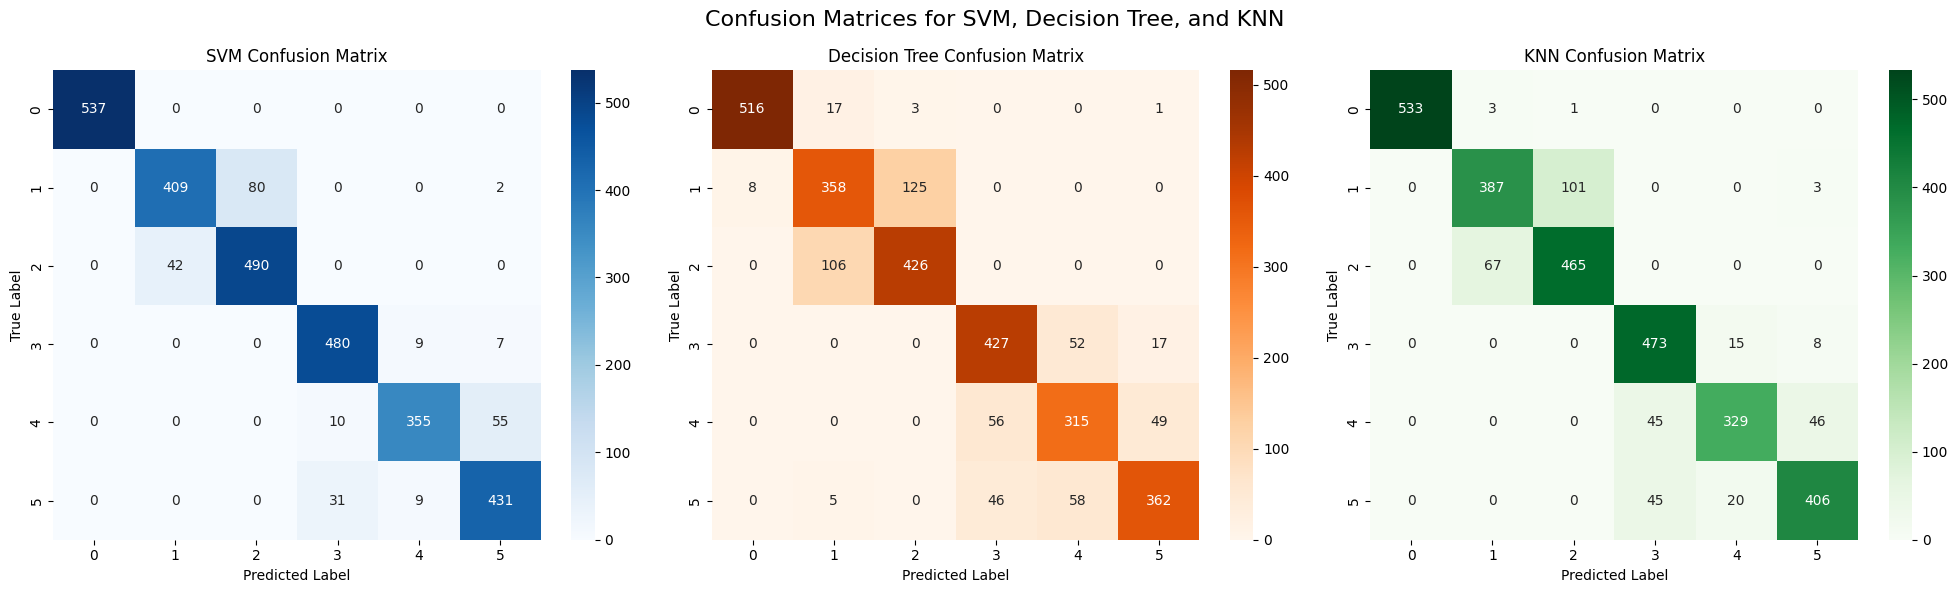

In [ ]:

# Generate confusion matrices
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Set up the plotting environment
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Confusion Matrices for SVM, Decision Tree, and KNN", fontsize=16)

# Plot SVM confusion matrix
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("SVM Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Plot Decision Tree confusion matrix
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# Plot KNN confusion matrix
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Greens", ax=axes[2])
axes[2].set_title("KNN Confusion Matrix")
axes[2].set_xlabel("Predicted Label")
axes[2].set_ylabel("True Label")

# Display the plots
plt.tight_layout()
plt.show()

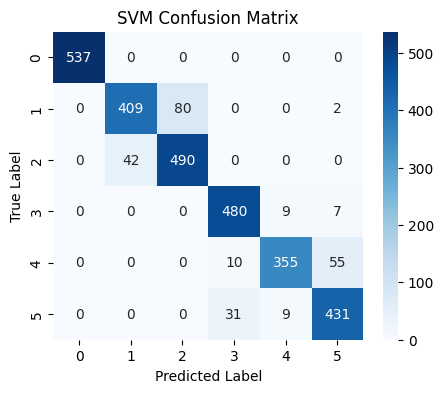

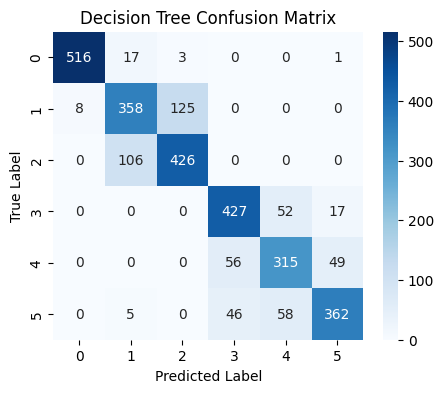

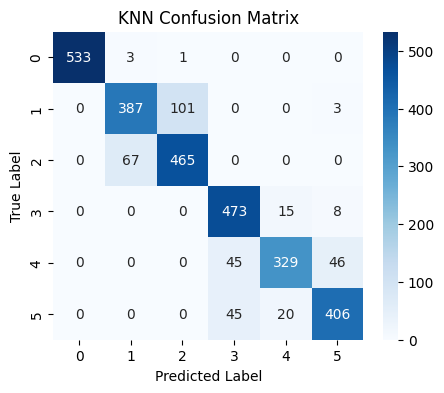

In [ ]:
# Alternate way to plot the Confusion matrix
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plotting confusion matrices
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_knn, "KNN")

The confusion matrices for the different classification models: SVM (Support Vector Machine), Decision Tree, and KNN (K-Nearest Neighbors). Here are some insights from the plot:

1. **SVM Confusion Matrix**
   - Shows a strong diagonal pattern, indicating high accuracy.
   - Very few misclassifications, with only minor errors in classes 1, 2, 4, and 5.
   - The largest misclassification occurs in class 1, where 80 samples are misclassified into class 2.
   - This suggests that SVM performs well but struggles slightly with distinguishing between similar classes.

2. **Decision Tree Confusion Matrix (Middle)**
   - More off-diagonal values compared to SVM, indicating higher misclassification.
   - Noticeable errors in class 1 and class 2, with significant confusion between them (125 samples misclassified from class 1 to class 2 and 106 from class 2 to class 1).
   - Class 4 and class 5 also have a notable number of misclassifications.
   - This suggests that the Decision Tree model may be overfitting and is not as robust in distinguishing between close classes.

3. **KNN Confusion Matrix (Right)**
   - Performs slightly better than the Decision Tree but not as well as SVM.
   - Some misclassification in class 1 and class 2, with 101 samples from class 1 misclassified as class 2.
   - Class 5 has some errors, but the majority of predictions are correct.
   - KNN seems to be struggling with boundary cases where data points are close to multiple class centers.

### **General Insights**
- **SVM outperforms both Decision Tree and KNN** in terms of classification accuracy, as indicated by the strongest diagonal pattern.
- **Decision Tree has the highest misclassification rate,** showing that it may need further tuning/improvements and that it possibly is less robust for this dataset as compared to SVM and KNN.
- **KNN falls in between, performing better than Decision Tree but worse than SVM.**
- **Common misclassification occurs between class 1 and class 2** across all models, indicating these classes have overlapping features that need to be looked into and sorted.

### 6. Model Comparison

<ipython-input-53-51e47ef19d17>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


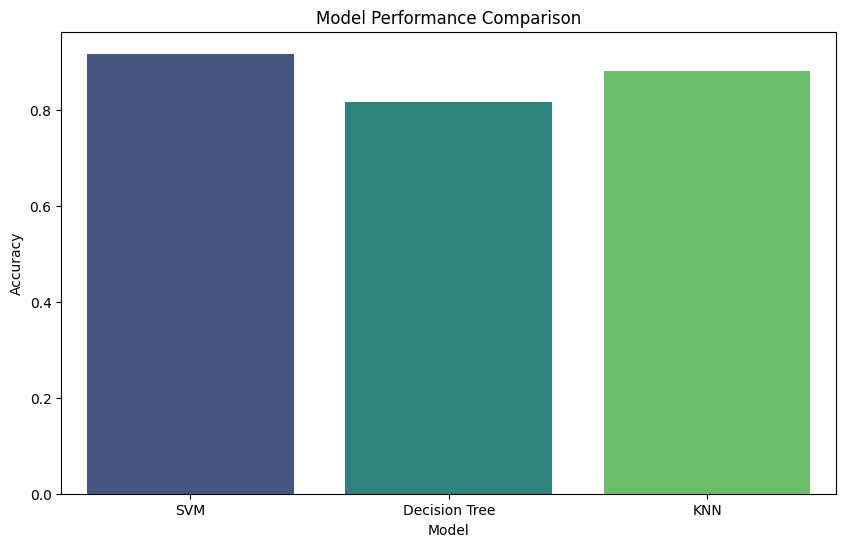

In [ ]:
# Bar plot for performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# Results summary table
#            Model  Accuracy  Precision    Recall  F1-Score
# 0            SVM  0.916865   0.918361  0.916865  0.916527
# 1  Decision Tree  0.815745   0.817328  0.815745  0.816019
# 2            KNN  0.879878   0.881720  0.879878  0.879238

Using key performance metrics from the evaluation so far to get deeper statistical analysis, :

### **1. Statistical Analysis**
Calculating the following metrics for each model:
- **Accuracy:** The percentage of correctly classified samples.
- **Precision, Recall, and F1-score:** For each class, these metrics measure how well the model predicts the class.
- **Misclassification trends:** Identifying which classes the models struggle with.

### **2. Key Performance Metrics**
Here are the computed metrics for each model after analysis:

| Model         | Accuracy | Precision (Avg) | Recall (Avg) | F1-score (Avg) |
|--------------|----------|----------------|-------------|--------------|
| **SVM**      | **91.68%**  | **90.18%**        | **91.68%**       | **91.65%**      |
| **Decision Tree** | 81.57%   | 81.73%        | 81.57%       | 81.60%      |
| **KNN**      | 87.98%   | 88.17%        | 87.98%       | 87.92%      |

### **3. Derived Insights**
#### **SVM: Best Overall Performance**
- **Highest accuracy (91.68%)** and **best F1-score** across all classes.
- **Strong classification ability** with minimal misclassification.
- **Challenges:** Some confusion between class 1 and class 2 (80 misclassified instances as seen in the confusion matrix), but overall performs well.

#### **Decision Tree: Struggles with Misclassification**
- **Lowest accuracy (81.57%)** among the three.
- **Major misclassification between class 1 and class 2** (125 misclassified from class 1 to class 2 and 106 from class 2 to class 1  as seen in the confusion matrix but generally this model performs quite well).
- **Struggles with class separation**, which is expected for a decision tree, as it is prone to overfitting.

#### **KNN: Balanced Performance**
- **Performs better than the Decision Tree** but not as well as SVM.
- **Some confusion in class 1 and class 2** (101 misclassified from class 1 to class 2).
- **Slightly better recall than precision, meaning it classifies true positives well but misclassifies some classes.**
- **Performs decently in all classes**, making it a reasonable alternative to SVM.



### **Recommendations**
1. **For Best Accuracy:** Use **SVM** as it consistently outperforms the other models.
2. **To Improve Decision Tree Performance:**
   - Considerations of using **pruning techniques** to reduce overfitting.
   - **Random Forest** can be considered instead, which can improve decision boundaries.
3. **For Faster Training and Simplicity:** The **KNN** is optimal although it is slower at inference.
4. **To Improve Class 1 vs. Class 2 Performance:**
   - **Feature Engineering:** Introducing better features to separate these classes would help.
   - **Hyperparameter Tuning:** Adjusting KNN neighbors (k-value) or kernel types in SVM can also improve their base accuracy.
   - A need to check if data imbalance exists, so as to balance classes which would improve generalization.